In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from skopt.plots import plot_convergence
from skopt import forest_minimize
import Model_Evaluation as me

In [2]:
data = pd.read_csv('pack_ext_fs_13.csv')
data

,Year_Month,Sum of Sales,"Food & Kindred Products (000s, SA)_freight_m_trucking",Super Long-Haul (550+ mi)_freight_m_trucking,Change in Total Transp. Emp. (000's)_driver_indicators_m_trucking,"Total Class 8, North America_Retail Sales (Ward's)_M/M % Change_indicators_m_trucking_trailer","Total Trailers, U.S._Production_M/M % Change_indicators_m_trucking_trailer","Total Classes 4-7, North America_Inventories (Ward's)_M/M % Change_indicators_m_trucking_trailer",FTR Truck Loadings_M/M % Change_freight_m_trucking_trailer,FTR Rail Intermodal Loadings_M/M % Change_freight_m_trucking_trailer,"FTR Rail Carloadings (carload + intermodal) (000s, SA)_freight_m_trucking_trailer",FTR Rail Carloadings_M/M % Change_freight_m_trucking_trailer,FTR Cl. 8 Truck Tonnage_M/M % Change_freight_m_trucking_trailer,Change in Distillate Fuel Inventories_x
0,2008-01,381696.51,7126.929795,6351.102588,2.0,17.711599,-10.826287,-5.728404,-2.749882,-1.855190,3093.638815,1.794564,-3.537698,-2981.0
1,2008-02,430305.85,7090.093356,6306.556660,4.0,-21.096509,-16.623657,2.197078,0.590421,1.841867,3167.478461,2.386822,0.994483,-13327.0
2,2008-03,451627.81,7130.846968,6261.756219,0.0,12.451390,-6.406104,-6.795043,0.963854,0.682647,3164.474988,-0.094822,1.500016,-9852.0
3,2008-04,467417.48,7139.440571,6271.352278,5.0,-9.859063,-20.856725,-3.430210,-0.014003,-2.911224,2955.033944,-6.618508,-0.384513,-733.0
4,2008-05,462676.37,7179.943436,6275.163788,-12.0,3.365907,14.177437,5.186474,-0.794587,3.273510,3059.748460,3.543598,-0.798424,6890.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,2020-07,456579.51,9375.896057,6240.013431,48.0,-25.612015,-33.586799,-12.877938,-11.868303,-12.597259,2202.067829,-14.351778,-8.401269,2134.0
151,2020-08,318564.72,9520.297567,6312.982923,85.0,-20.398412,13.435626,-7.676672,3.278161,4.534112,2185.585205,-0.748507,0.733856,1353.0
152,2020-09,980476.36,9472.590699,6258.050709,44.0,46.491376,17.536391,3.496257,5.879324,10.985691,2400.291965,9.823765,1.478794,-7196.0
153,2020-10,922901.36,9565.479621,6333.545023,62.0,6.538928,-11.888071,1.187032,2.427460,6.261749,2619.082565,9.115166,3.304924,-10130.4


In [3]:
data = data.dropna(axis = 1)
data

,Year_Month,Sum of Sales,"Food & Kindred Products (000s, SA)_freight_m_trucking",Super Long-Haul (550+ mi)_freight_m_trucking,Change in Total Transp. Emp. (000's)_driver_indicators_m_trucking,"Total Class 8, North America_Retail Sales (Ward's)_M/M % Change_indicators_m_trucking_trailer","Total Trailers, U.S._Production_M/M % Change_indicators_m_trucking_trailer","Total Classes 4-7, North America_Inventories (Ward's)_M/M % Change_indicators_m_trucking_trailer",FTR Truck Loadings_M/M % Change_freight_m_trucking_trailer,FTR Rail Intermodal Loadings_M/M % Change_freight_m_trucking_trailer,"FTR Rail Carloadings (carload + intermodal) (000s, SA)_freight_m_trucking_trailer",FTR Rail Carloadings_M/M % Change_freight_m_trucking_trailer,FTR Cl. 8 Truck Tonnage_M/M % Change_freight_m_trucking_trailer,Change in Distillate Fuel Inventories_x
0,2008-01,381696.51,7126.929795,6351.102588,2.0,17.711599,-10.826287,-5.728404,-2.749882,-1.855190,3093.638815,1.794564,-3.537698,-2981.0
1,2008-02,430305.85,7090.093356,6306.556660,4.0,-21.096509,-16.623657,2.197078,0.590421,1.841867,3167.478461,2.386822,0.994483,-13327.0
2,2008-03,451627.81,7130.846968,6261.756219,0.0,12.451390,-6.406104,-6.795043,0.963854,0.682647,3164.474988,-0.094822,1.500016,-9852.0
3,2008-04,467417.48,7139.440571,6271.352278,5.0,-9.859063,-20.856725,-3.430210,-0.014003,-2.911224,2955.033944,-6.618508,-0.384513,-733.0
4,2008-05,462676.37,7179.943436,6275.163788,-12.0,3.365907,14.177437,5.186474,-0.794587,3.273510,3059.748460,3.543598,-0.798424,6890.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,2020-07,456579.51,9375.896057,6240.013431,48.0,-25.612015,-33.586799,-12.877938,-11.868303,-12.597259,2202.067829,-14.351778,-8.401269,2134.0
151,2020-08,318564.72,9520.297567,6312.982923,85.0,-20.398412,13.435626,-7.676672,3.278161,4.534112,2185.585205,-0.748507,0.733856,1353.0
152,2020-09,980476.36,9472.590699,6258.050709,44.0,46.491376,17.536391,3.496257,5.879324,10.985691,2400.291965,9.823765,1.478794,-7196.0
153,2020-10,922901.36,9565.479621,6333.545023,62.0,6.538928,-11.888071,1.187032,2.427460,6.261749,2619.082565,9.115166,3.304924,-10130.4


In [4]:
data['month'] = data['Year_Month'].str.split('-', expand=True)[1]
year_month = data['Year_Month']

In [5]:
data.drop(['Year_Month'], axis=1, inplace=True)

In [6]:
data

,Sum of Sales,"Food & Kindred Products (000s, SA)_freight_m_trucking",Super Long-Haul (550+ mi)_freight_m_trucking,Change in Total Transp. Emp. (000's)_driver_indicators_m_trucking,"Total Class 8, North America_Retail Sales (Ward's)_M/M % Change_indicators_m_trucking_trailer","Total Trailers, U.S._Production_M/M % Change_indicators_m_trucking_trailer","Total Classes 4-7, North America_Inventories (Ward's)_M/M % Change_indicators_m_trucking_trailer",FTR Truck Loadings_M/M % Change_freight_m_trucking_trailer,FTR Rail Intermodal Loadings_M/M % Change_freight_m_trucking_trailer,"FTR Rail Carloadings (carload + intermodal) (000s, SA)_freight_m_trucking_trailer",FTR Rail Carloadings_M/M % Change_freight_m_trucking_trailer,FTR Cl. 8 Truck Tonnage_M/M % Change_freight_m_trucking_trailer,Change in Distillate Fuel Inventories_x,month
0,381696.51,7126.929795,6351.102588,2.0,17.711599,-10.826287,-5.728404,-2.749882,-1.855190,3093.638815,1.794564,-3.537698,-2981.0,01
1,430305.85,7090.093356,6306.556660,4.0,-21.096509,-16.623657,2.197078,0.590421,1.841867,3167.478461,2.386822,0.994483,-13327.0,02
2,451627.81,7130.846968,6261.756219,0.0,12.451390,-6.406104,-6.795043,0.963854,0.682647,3164.474988,-0.094822,1.500016,-9852.0,03
3,467417.48,7139.440571,6271.352278,5.0,-9.859063,-20.856725,-3.430210,-0.014003,-2.911224,2955.033944,-6.618508,-0.384513,-733.0,04
4,462676.37,7179.943436,6275.163788,-12.0,3.365907,14.177437,5.186474,-0.794587,3.273510,3059.748460,3.543598,-0.798424,6890.0,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,456579.51,9375.896057,6240.013431,48.0,-25.612015,-33.586799,-12.877938,-11.868303,-12.597259,2202.067829,-14.351778,-8.401269,2134.0,07
151,318564.72,9520.297567,6312.982923,85.0,-20.398412,13.435626,-7.676672,3.278161,4.534112,2185.585205,-0.748507,0.733856,1353.0,08
152,980476.36,9472.590699,6258.050709,44.0,46.491376,17.536391,3.496257,5.879324,10.985691,2400.291965,9.823765,1.478794,-7196.0,09
153,922901.36,9565.479621,6333.545023,62.0,6.538928,-11.888071,1.187032,2.427460,6.261749,2619.082565,9.115166,3.304924,-10130.4,10


### Since month is a categorical variable, we will need to do one-hot encoding.

In [7]:
ohc = OneHotEncoder()
ohe = ohc.fit_transform(data['month'].values.reshape(-1,1)).toarray()
dfone_hot = pd.DataFrame(ohe, columns=['month_'+str(ohc.categories_[0][j]) 
                                           for j in range(len(ohc.categories_[0]))])
data = data.join(dfone_hot)

In [8]:
data

,Sum of Sales,"Food & Kindred Products (000s, SA)_freight_m_trucking",Super Long-Haul (550+ mi)_freight_m_trucking,Change in Total Transp. Emp. (000's)_driver_indicators_m_trucking,"Total Class 8, North America_Retail Sales (Ward's)_M/M % Change_indicators_m_trucking_trailer","Total Trailers, U.S._Production_M/M % Change_indicators_m_trucking_trailer","Total Classes 4-7, North America_Inventories (Ward's)_M/M % Change_indicators_m_trucking_trailer",FTR Truck Loadings_M/M % Change_freight_m_trucking_trailer,FTR Rail Intermodal Loadings_M/M % Change_freight_m_trucking_trailer,"FTR Rail Carloadings (carload + intermodal) (000s, SA)_freight_m_trucking_trailer",...,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12
0,381696.51,7126.929795,6351.102588,2.0,17.711599,-10.826287,-5.728404,-2.749882,-1.855190,3093.638815,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,430305.85,7090.093356,6306.556660,4.0,-21.096509,-16.623657,2.197078,0.590421,1.841867,3167.478461,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,451627.81,7130.846968,6261.756219,0.0,12.451390,-6.406104,-6.795043,0.963854,0.682647,3164.474988,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,467417.48,7139.440571,6271.352278,5.0,-9.859063,-20.856725,-3.430210,-0.014003,-2.911224,2955.033944,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,462676.37,7179.943436,6275.163788,-12.0,3.365907,14.177437,5.186474,-0.794587,3.273510,3059.748460,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,456579.51,9375.896057,6240.013431,48.0,-25.612015,-33.586799,-12.877938,-11.868303,-12.597259,2202.067829,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
151,318564.72,9520.297567,6312.982923,85.0,-20.398412,13.435626,-7.676672,3.278161,4.534112,2185.585205,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
152,980476.36,9472.590699,6258.050709,44.0,46.491376,17.536391,3.496257,5.879324,10.985691,2400.291965,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
153,922901.36,9565.479621,6333.545023,62.0,6.538928,-11.888071,1.187032,2.427460,6.261749,2619.082565,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [9]:
target = data['Sum of Sales']/100000
features = data.drop(['Sum of Sales'], axis=1)

In [10]:
# Standardizing the features based on unit variance
features = StandardScaler().fit_transform(features)

# split train test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.071, shuffle=False, random_state=60616)

In [11]:
X_train.shape

(143, 25)

In [12]:
X_test.shape

(12, 25)

### Hyperparameter Tuning

In [13]:
def objective(params):
    # unpacking the parameters
    learning_rate, gamma, max_depth, min_child_weight, reg_lambda, reg_alpha = params
    
    model_iii = XGBRegressor(learning_rate=learning_rate, gamma=gamma, max_depth=max_depth, min_child_weight=min_child_weight, reg_lambda=reg_lambda, reg_alpha=reg_alpha)
    model_iii.fit(X_train, y_train)
    
    y_pred = model_iii.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    # Handle some numerical issue going on
    if np.abs(mse + 1) < 0.01 or mse < -1.0:
        return 0.0
    else:
        return mse

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 1.0223
Function value obtained: 30.0452
Current minimum: 30.0452
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0469
Function value obtained: 30.0422
Current minimum: 30.0422
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0738
Function value obtained: 5.6954
Current minimum: 5.6954
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0429
Function value obtained: 33.3932
Current minimum: 5.6954
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.1107
Function value obtained: 7.2717
Current minimum: 5.6954
Iteration No: 6 started. Evalu

D:\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 18 ended. Search finished for the next optimal point.
Time taken: 0.7483
Function value obtained: 6.0779
Current minimum: 5.0456
Iteration No: 19 started. Searching for the next optimal point.
Iteration No: 19 ended. Search finished for the next optimal point.
Time taken: 0.7129
Function value obtained: 5.5090
Current minimum: 5.0456
Iteration No: 20 started. Searching for the next optimal point.
Iteration No: 20 ended. Search finished for the next optimal point.
Time taken: 0.7467
Function value obtained: 6.2381
Current minimum: 5.0456
Iteration No: 21 started. Searching for the next optimal point.
Iteration No: 21 ended. Search finished for the next optimal point.
Time taken: 0.7272
Function value obtained: 4.9306
Current minimum: 4.9306
Iteration No: 22 started. Searching for the next optimal point.
Iteration No: 22 ended. Search finished for the next optimal point.
Time taken: 0.6887
Function value obtained: 5.8780
Current minimum: 4.9306
Iteration No: 23 started. Sea

D:\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 37 ended. Search finished for the next optimal point.
Time taken: 0.6986
Function value obtained: 4.7339
Current minimum: 4.3984
Iteration No: 38 started. Searching for the next optimal point.


D:\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 38 ended. Search finished for the next optimal point.
Time taken: 0.6780
Function value obtained: 4.7025
Current minimum: 4.3984
Iteration No: 39 started. Searching for the next optimal point.


D:\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 39 ended. Search finished for the next optimal point.
Time taken: 0.6552
Function value obtained: 4.7025
Current minimum: 4.3984
Iteration No: 40 started. Searching for the next optimal point.
Iteration No: 40 ended. Search finished for the next optimal point.
Time taken: 0.7294
Function value obtained: 4.9116
Current minimum: 4.3984
Iteration No: 41 started. Searching for the next optimal point.
Iteration No: 41 ended. Search finished for the next optimal point.
Time taken: 0.6704
Function value obtained: 4.5785
Current minimum: 4.3984
Iteration No: 42 started. Searching for the next optimal point.
Iteration No: 42 ended. Search finished for the next optimal point.
Time taken: 0.7283
Function value obtained: 5.1396
Current minimum: 4.3984
Iteration No: 43 started. Searching for the next optimal point.


D:\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 43 ended. Search finished for the next optimal point.
Time taken: 0.7322
Function value obtained: 4.5295
Current minimum: 4.3984
Iteration No: 44 started. Searching for the next optimal point.
Iteration No: 44 ended. Search finished for the next optimal point.
Time taken: 0.6369
Function value obtained: 4.6566
Current minimum: 4.3984
Iteration No: 45 started. Searching for the next optimal point.
Iteration No: 45 ended. Search finished for the next optimal point.
Time taken: 0.6689
Function value obtained: 4.7888
Current minimum: 4.3984
Iteration No: 46 started. Searching for the next optimal point.
Iteration No: 46 ended. Search finished for the next optimal point.
Time taken: 0.7241
Function value obtained: 4.2777
Current minimum: 4.2777
Iteration No: 47 started. Searching for the next optimal point.
Iteration No: 47 ended. Search finished for the next optimal point.
Time taken: 0.7472
Function value obtained: 4.4800
Current minimum: 4.2777
Iteration No: 48 started. Sea

D:\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 50 ended. Search finished for the next optimal point.
Time taken: 0.7059
Function value obtained: 4.4800
Current minimum: 4.2777
Minimum MSE found: 4.27769
Optimal parameters:
learning_rate: 0.9
gamma: 0.5
max_depth: 8
min_child_weight: 5
reg_lambda: 1
reg_alpha: 1


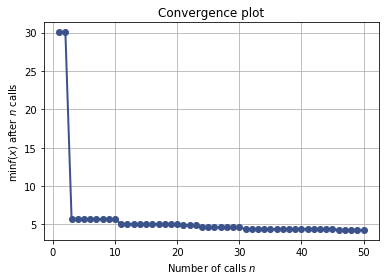

In [14]:
# Bayesian Optimization
num_thread = 20
params = ['learning_rate', 'gamma', 'max_depth', 'min_child_weight', 'reg_lambda', 'reg_alpha']

space = [(0.0001, 0.0009, 0.001, 0.009, 0.01, 0.09, 0.1, 0.9),
         (0.25, 0.5, 0.75, 1, 1.25, 1.5, 2),
         (2, 4, 6, 8, 10),
         (1,3,5,7,9),
         (0.25, 0.5, 0.75, 1, 1.25, 1.5, 2),
         (0.25, 0.5, 0.75, 1, 1.25, 1.5, 2),
        ]

try:
    res_fm = forest_minimize(objective, space, n_calls=50,
                     random_state=60616,base_estimator= 'RF',acq_func='PI',
                     verbose=True, n_jobs=num_thread)
except ValueError:
    print('Forest diverged, random search intialized')
    res_fm = dummy_minimize(objective, space, n_calls=30,
         random_state=60616,
         verbose=True)

print('Minimum MSE found: {:6.5f}'.format(res_fm.fun))
print('Optimal parameters:')

for (p, x_) in zip(params, res_fm.x):
    print('{}: {}'.format(p, x_))

plot_convergence(res_fm);

### Regression using optimal parameters

In [23]:
reg = XGBRegressor(learning_rate=0.9, gamma=0.5, max_depth=8, min_child_weight=5,
                    reg_lambda=1, reg_alpha=1, random_state=60616)
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

In [24]:
# For Training data
me.evaluate_model(y_pred_train,y_train)

			Model Performance

Mean Absolute Percentage Error: 0.05113042813803334

Mean Absolute Error: 0.23343642966155018

BIAS: -0.006993106486116266

Mean Squared Error: 0.006993205980641078

Root Mean Squared Error: 0.0836253907652519


In [25]:
# For testing data
me.evaluate_model(y_pred_test,y_test)

			Model Performance

Mean Absolute Percentage Error: 0.28872351981627786

Mean Absolute Error: 1.672260461183676

BIAS: 0.8715767117136645

Mean Squared Error: 9.11575157281925

Root Mean Squared Error: 3.019230294763758


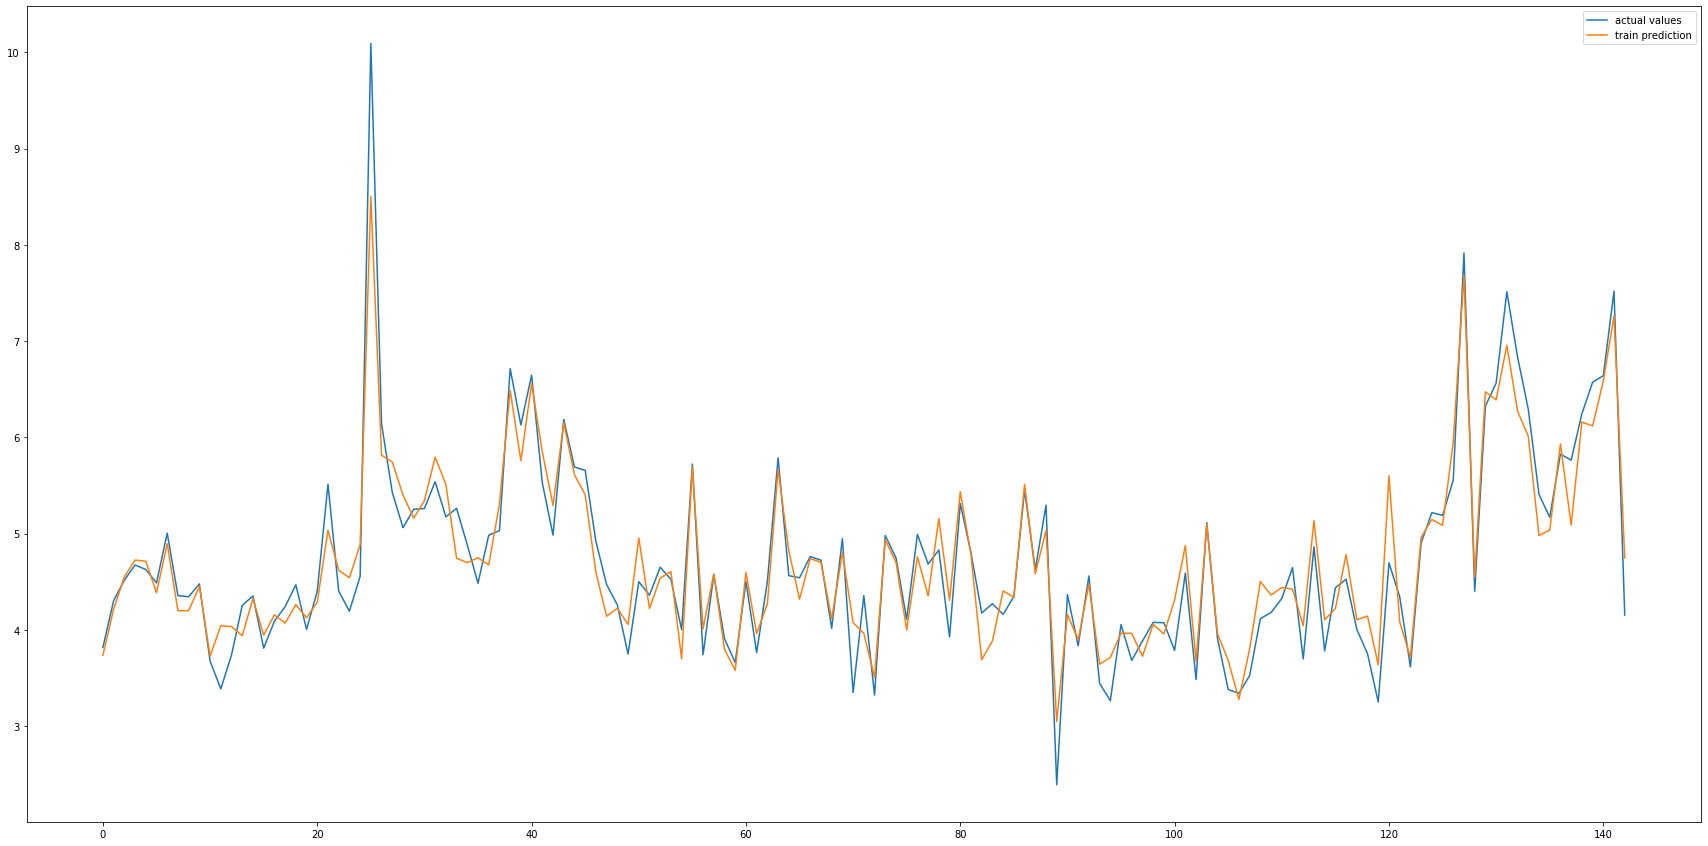

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=((30,15)))
plt.plot(target[0:143], label="actual values")
plt.plot(y_pred_train, label='train prediction')
plt.legend()
plt.show()

In [27]:
actual = np.array(y_test)
actual

array([3.9184229, 5.3092577, 6.4982704, 5.847473 , 7.0519424, 6.6491627,
       6.292482 , 4.5657951, 3.1856472, 9.8047636, 9.2290136, 2.9348693])

In [28]:
lists = [actual*100000, y_pred_test*100000]
df = pd.concat([pd.Series(x) for x in lists], axis=1)
df = df.rename(columns={0: 'Actual', 1: 'Predicted'})
df

,Actual,Predicted
0,391842.29,601652.860641
1,530925.77,506370.115280
2,649827.04,601207.304001
3,584747.30,492971.038818
4,705194.24,396436.238289
5,664916.27,418788.003922
6,629248.20,591556.644440
7,456579.51,385232.377052
8,318564.72,406880.998611
9,980476.36,556721.878052


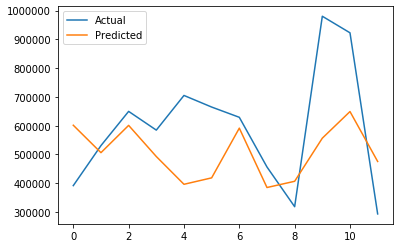

In [29]:
plt.plot(df.Actual, label='Actual')
plt.plot(df.Predicted, label='Predicted')
plt.legend()
plt.show()

In [30]:
lists = [np.array(year_month[-12:]), actual*100000, y_pred_test*100000]
df = pd.concat([pd.Series(x) for x in lists], axis=1)
df = df.rename(columns={0: 'Year_Month', 1: 'Actual', 2: 'Predicted'})
df

,Year_Month,Actual,Predicted
0,2019-12,391842.29,601652.860641
1,2020-01,530925.77,506370.115280
2,2020-02,649827.04,601207.304001
3,2020-03,584747.30,492971.038818
4,2020-04,705194.24,396436.238289
5,2020-05,664916.27,418788.003922
6,2020-06,629248.20,591556.644440
7,2020-07,456579.51,385232.377052
8,2020-08,318564.72,406880.998611
9,2020-09,980476.36,556721.878052
